In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats

In [2]:
priors_dict = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}

theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(100000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,100000))
print(np.shape(theta))

(1600000,)
(16, 100000)


In [3]:
names = ['bottleneck_strength_domestic',
         'bottleneck_strength_wild',
         'bottleneck_time_domestic',
         'bottleneck_time_wild',
         'captive_time',
         'div_time',
         'mig_length_post_split',
         'mig_length_wild',
         'mig_rate_captive',
         'mig_rate_post_split',
         'mig_rate_wild',
         'pop_size_wild_1',
         'pop_size_wild_2',
         'pop_size_captive',
         'pop_size_domestic_1',
         'pop_size_domestic_2',
         'mutation_rate',
         'recombination_rate']

In [4]:
theta_2 = pd.read_csv("./tr2_100k.csv")
print(np.shape(theta_2))
theta_2.columns=names
theta_2

(100000, 18)


,bottleneck_strength_domestic,bottleneck_strength_wild,bottleneck_time_domestic,bottleneck_time_wild,captive_time,div_time,mig_length_post_split,mig_length_wild,mig_rate_captive,mig_rate_post_split,mig_rate_wild,pop_size_wild_1,pop_size_wild_2,pop_size_captive,pop_size_domestic_1,pop_size_domestic_2,mutation_rate,recombination_rate
0,1843.79220,6098.8945,4916.1550,3357.0046,12.670798,56909.980,5885.4824,15.866899,0.076828,0.028644,0.078455,7337.5910,6722.9717,359.889650,8845.5220,11177.2295,2.279186e-08,1.578849e-08
1,6940.74760,674.9775,3111.1873,3800.7502,18.315157,45625.410,129178.5500,11.777484,0.116985,0.454748,0.068655,6103.0664,9115.2770,79.253500,9106.8470,14264.6045,2.483229e-08,1.544785e-08
2,1679.56470,4144.8900,3100.6245,3508.2754,38.806560,55015.870,8193.5290,29.367508,0.057924,0.039377,0.062719,5038.5576,9055.0100,103.658460,6144.0884,8462.2920,3.279620e-08,1.035882e-08
3,3202.67970,32605.1900,3022.3599,3756.4976,16.222263,50220.816,45041.4900,39.789474,0.071188,0.042592,0.092694,8677.7530,12030.6455,138.781620,9271.6560,9928.2270,4.204990e-08,1.440867e-08
4,286.37012,15464.2060,4036.7480,3122.4194,12.931703,66274.950,46296.8900,20.957169,0.076768,0.007348,0.057618,9510.4890,13886.1870,137.089310,5819.5327,9897.5640,2.016600e-08,1.188632e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,824.94710,4751.1140,3420.8484,3438.0852,12.709955,53252.940,2300.1519,14.039332,0.058400,0.037001,0.085329,5463.9480,8980.1440,164.618700,7529.9033,6918.1030,2.595498e-08,1.035247e-08
99996,2563.63060,2618.8516,3299.9788,3329.2236,14.693401,40449.016,38825.2800,7.791860,0.111917,0.055955,0.093922,7500.3716,14217.3700,84.484400,6356.7134,13964.8720,2.419914e-08,1.321457e-08
99997,1678.87160,6945.0240,2423.1956,3079.2393,10.667477,46720.023,5403.2930,15.687789,0.094756,0.028330,0.092033,4781.8706,7474.6270,206.725810,7509.8400,13461.3720,2.502494e-08,1.273000e-08
99998,3124.96300,7362.3300,2739.0361,3860.0964,19.483124,51470.258,675.5808,20.134186,0.120255,0.028610,0.061266,6638.7740,11079.9220,125.431854,5098.7524,10604.3240,2.254770e-08,1.092961e-08


In [5]:
data = theta_2.iloc[:,[6,7,9,10]]
data

,mig_length_post_split,mig_length_wild,mig_rate_post_split,mig_rate_wild
0,5885.4824,15.866899,0.028644,0.078455
1,129178.5500,11.777484,0.454748,0.068655
2,8193.5290,29.367508,0.039377,0.062719
3,45041.4900,39.789474,0.042592,0.092694
4,46296.8900,20.957169,0.007348,0.057618
...,...,...,...,...
99995,2300.1519,14.039332,0.037001,0.085329
99996,38825.2800,7.791860,0.055955,0.093922
99997,5403.2930,15.687789,0.028330,0.092033
99998,675.5808,20.134186,0.028610,0.061266


In [8]:
data_log_scaled = np.log(data)  # Adding 1 to avoid log(0)
data_log_scaled

,mig_length_post_split,mig_length_wild,mig_rate_post_split,mig_rate_wild
0,8.680244,2.764235,-3.552803,-2.545230
1,11.768951,2.466190,-0.788013,-2.678660
2,9.011100,3.379889,-3.234582,-2.769089
3,10.715339,3.683602,-3.156087,-2.378452
4,10.742830,3.042481,-4.913299,-2.853918
...,...,...,...,...
99995,7.740730,2.641863,-3.296797,-2.461244
99996,10.566827,2.053080,-2.883210,-2.365295
99997,8.594764,2.752883,-3.563839,-2.385608
99998,6.515573,3.002419,-3.553995,-2.792533


/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

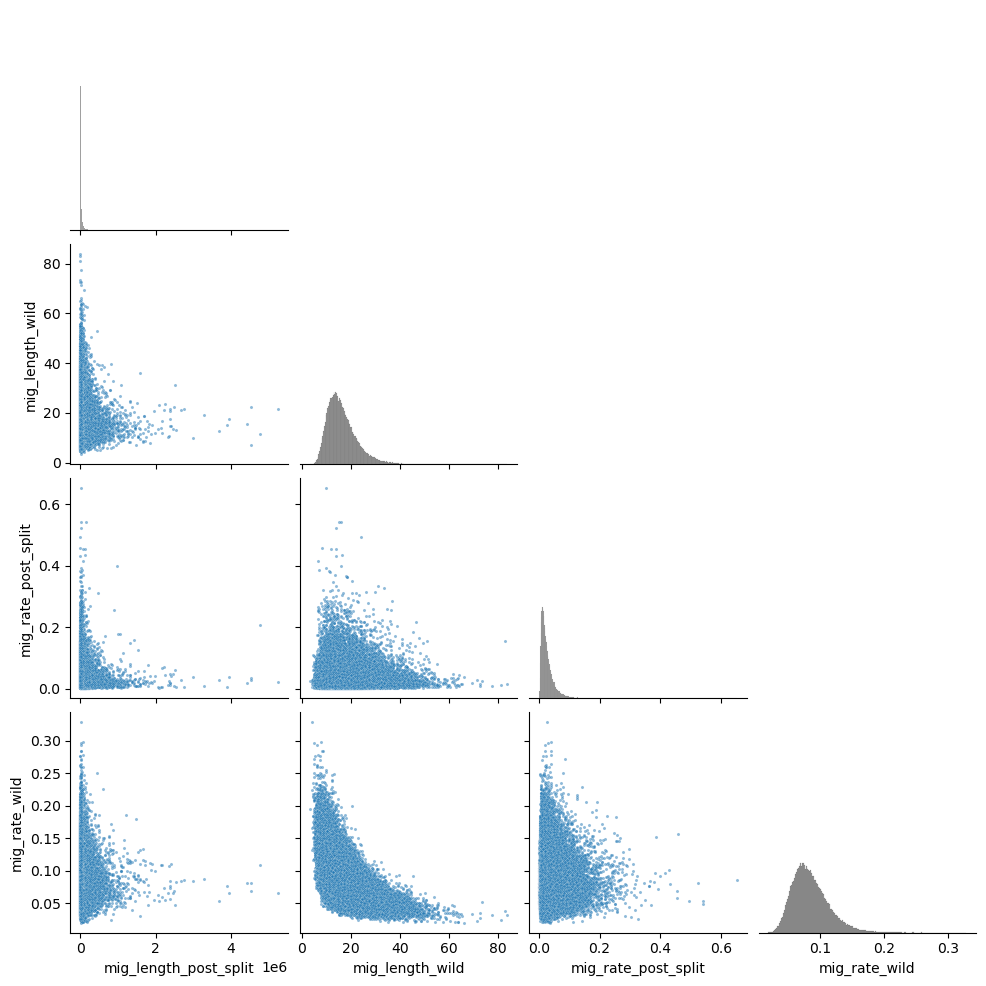

In [8]:
sns.pairplot(data, plot_kws={'alpha':0.5, 's':5},diag_kws={'color':'grey'}, corner=True)
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')

/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/wildcats/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

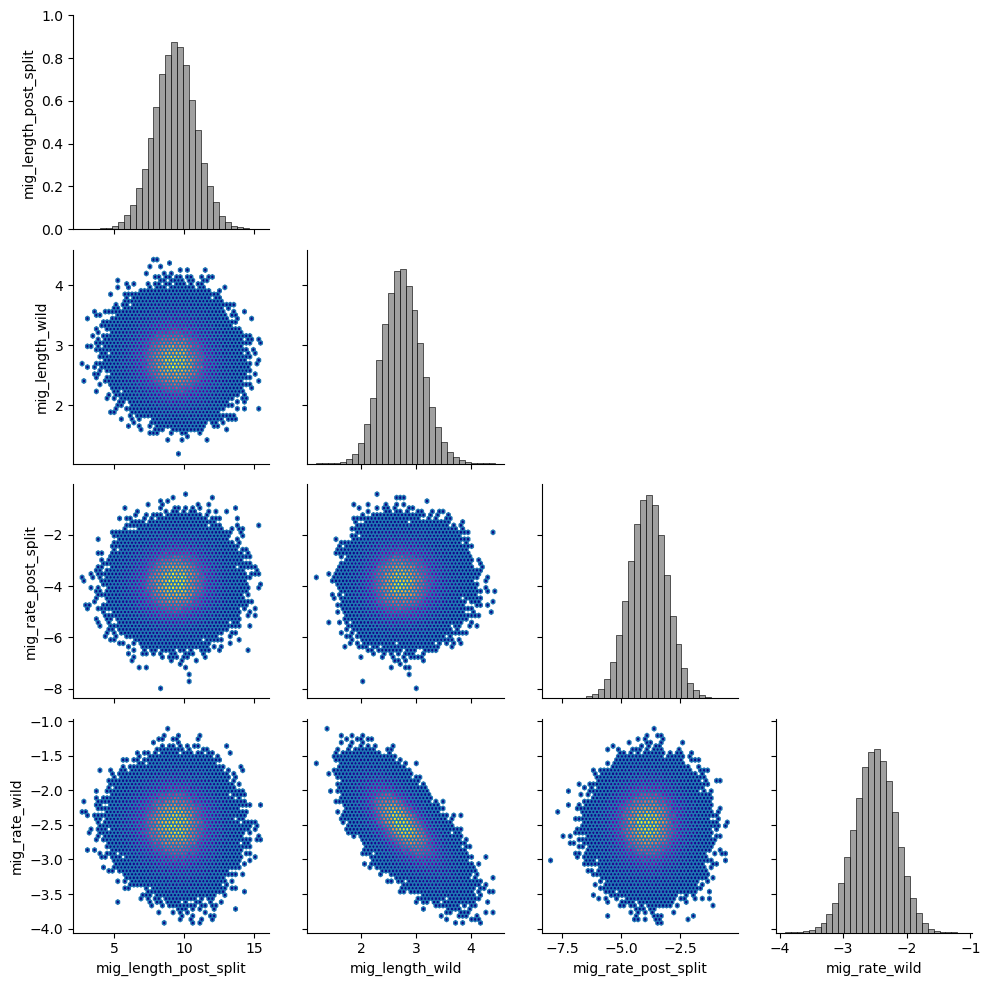

In [10]:
# Create the pairplot
g = sns.PairGrid(data_log_scaled)


# Map hexbin plots for both lower and upper triangles
g.map_lower(plt.hexbin, gridsize=50, cmap="plasma", mincnt=1)
#g.map_upper(plt.hexbin, gridsize=30, cmap="viridis", mincnt=1)

# Use KDE for diagonal (optional, for visualizing distribution)
g.map_diag(sns.histplot, kde=False, bins=30, color="gray")

for i in range(len(g.axes)):
    for j in range(len(g.axes)):
        if i < j:  # This condition hides the upper triangle
            g.axes[i, j].set_visible(False)

plt.savefig('pairplot_hex.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()